In [1]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
path_snow = "./data/rasters/new/SikSik_Snow.tif"
path_veg = "./data/rasters/new/SikSik_Veg.tif"
path_dem = "./data/rasters/new/SikSik_DEM.tif"

src_snow = rasterio.open(path_snow)
src_veg = rasterio.open(path_veg)
src_dem = rasterio.open(path_dem)

In [3]:
snow_depths = src_snow.read()[0]
#snow_depths = snow_depths[snow_depths > 0]
print(snow_depths.shape)

dem_height = src_dem.read()[0]
veg_height = src_veg.read()[0]


(181, 122)


In [4]:
snow_max = np.round(snow_depths.max()+0.5)
snow_min = 0.1
snow_step = 0.01
bsnow = np.arange(snow_min,snow_max,snow_step)

In [14]:
n_samples = 1
hist, bin_edges = np.histogram(snow_depths, bins=bsnow, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interpolate.interp1d(cum_values, bin_edges)
r = np.random.rand(n_samples)

In [15]:
depths_sim = inv_cdf(r)
hist_obs, bin_edges = np.histogram(snow_depths,bins=bsnow, density=True)
hist_sim, bin_edges = np.histogram(depths_sim,bins=bsnow, density=True)

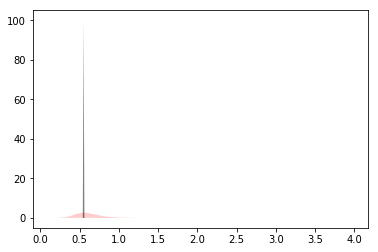

In [16]:
fig, ax = plt.subplots()
ax.fill(bin_edges[:-1], hist_obs, fc='red', alpha=0.2,
        label='input distribution')

ax.fill(bin_edges[:-1], hist_sim, fc='black', alpha=0.5,
        label='input distribution')

In [17]:
def find_nearest(array, value):
    array_diff = np.fabs(array - value)
    return np.unravel_index(array_diff.argmin(), array_diff.shape)


In [18]:
snow_depths[find_nearest(snow_depths,depths_sim)]

0.5593101

In [19]:
depths_sim

array([0.55930081])